# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Column Information

| **Column Name**                         | **Role**    | **Type**       | **Demographic** | **Description**                                                              | **Units**       | **Missing Values** |
|-----------------------------------------|-------------|----------------|-----------------|------------------------------------------------------------------------------|-----------------|--------------------|
| **Gender**                              | Feature     | Categorical    | Gender          | N/A                                                                          | N/A             | no                 |
| **Age**                                 | Feature     | Continuous     | Age             | N/A                                                                          | Years           | no                 |
| **Height**                              | Feature     | Continuous     | N/A             | N/A                                                                          | cm              | no                 |
| **Weight**                              | Feature     | Continuous     | N/A             | N/A                                                                          | kg              | no                 |
| **family_history_with_overweight**      | Feature     | Binary         | N/A             | Has a family member suffered or suffers from overweight?                      | N/A             | no                 |
| **FAVC**                                | Feature     | Binary         | N/A             | Do you eat high caloric food frequently?                                      | N/A             | no                 |
| **FCVC**                                | Feature     | Integer        | N/A             | Do you usually eat vegetables in your meals?                                  | N/A             | no                 |
| **NCP**                                 | Feature     | Continuous     | N/A             | How many main meals do you have daily?                                        | Meals/day       | no                 |
| **CAEC**                                | Feature     | Categorical    | N/A             | Do you eat any food between meals?                                            | N/A             | no                 |
| **SMOKE**                               | Feature     | Binary         | N/A             | Do you smoke?                                                                | N/A             | no                 |
| **CH2O**                                | Feature     | Continuous     | N/A             | How much water do you drink daily?                                            | Liters/day      | no                 |
| **SCC**                                 | Feature     | Binary         | N/A             | Do you monitor the calories you eat daily?                                    | N/A             | no                 |
| **FAF**                                 | Feature     | Continuous     | N/A             | How often do you have physical activity?                                      | Hours/week      | no                 |
| **TUE**                                 | Feature     | Integer        | N/A             | How much time do you use technological devices such as cell phone, videogames, television, computer, etc.? | Hours/day       | no                 |
| **CALC**                                | Feature     | Categorical    | N/A             | How often do you drink alcohol?                                               | N/A             | no                 |
| **MTRANS**                              | Feature     | Categorical    | N/A             | Which transportation do you usually use?                                      | N/A             | no                 |
| **NObeyesdad**                          | Target      | Categorical    | Obesity level   | Obesity level (target variable)                                               | N/A             | no                 |


In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


In [2]:
df = pd.read_csv(r'D:\Jagadish\Gided projects\Obesity\obesity_level.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Label
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,3,0,2.763573,0,0.000000,0.976473,1,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,3,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,3,0,1.674061,0,1.467863,0.780199,1,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,3,0,1.979848,0,1.967973,0.931721,1,Public_Transportation,Overweight_Level_II


In [3]:
df.shape

(20758, 18)

In [4]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Label'],
      dtype='object')

# Clean dataset by using duplicate method

In [5]:
df.duplicated().sum()

np.int64(0)

# Check missing value

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Label                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
df.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
Label                                 7
dtype: int64

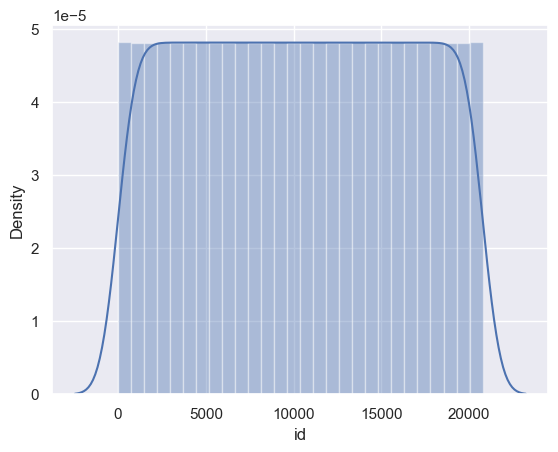

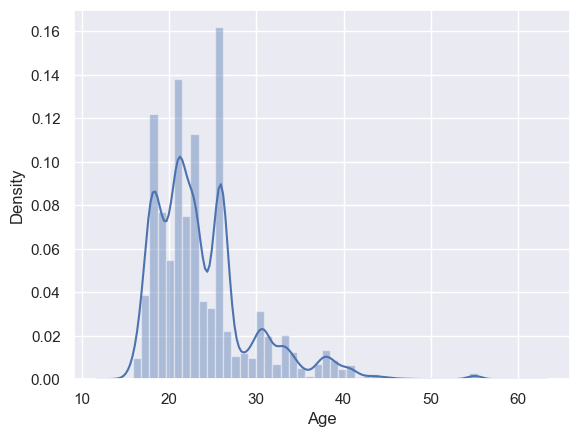

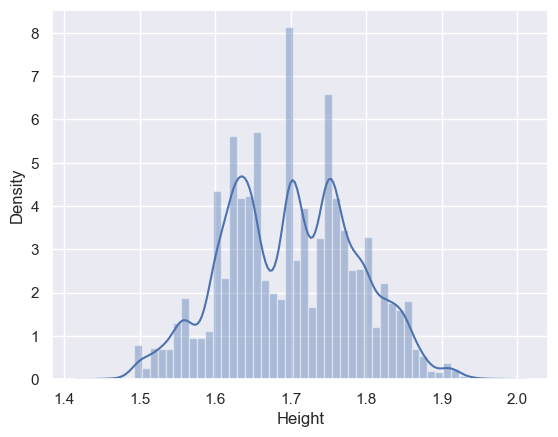

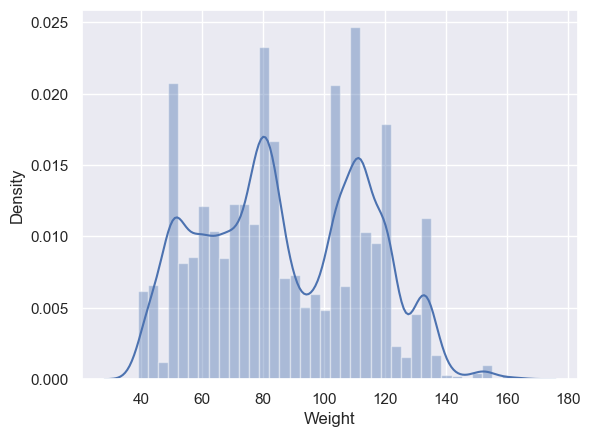

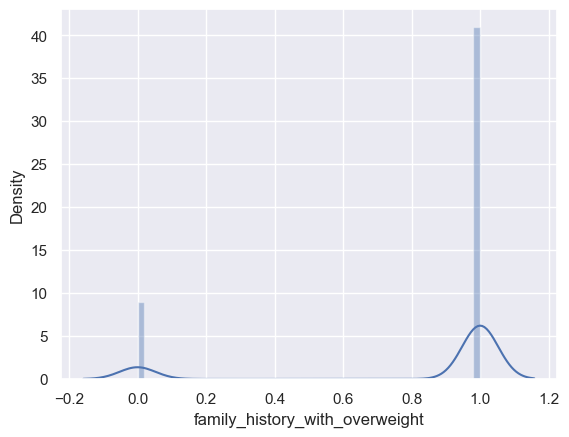

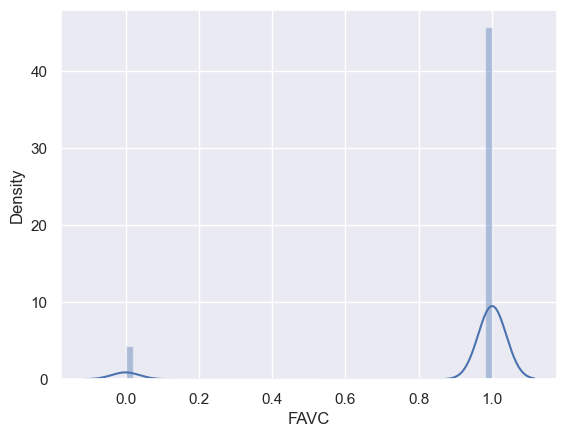

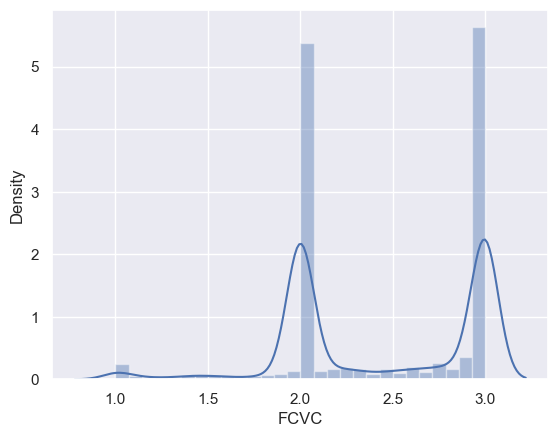

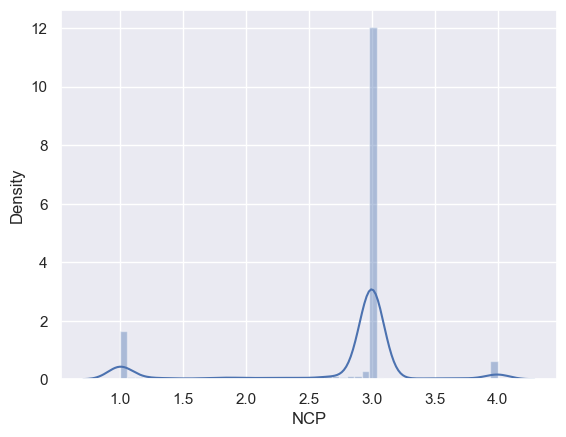

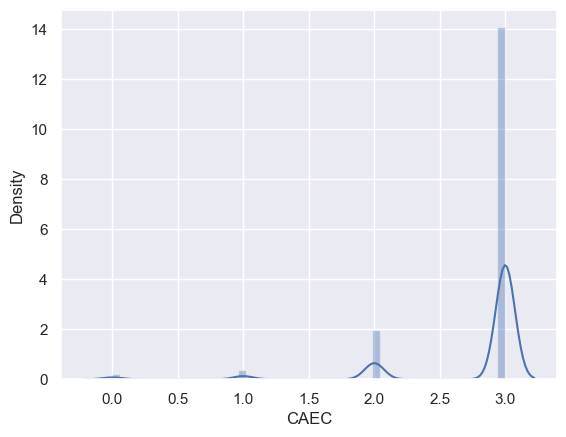

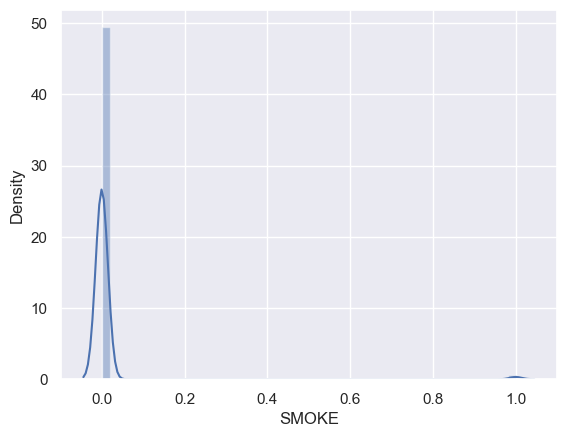

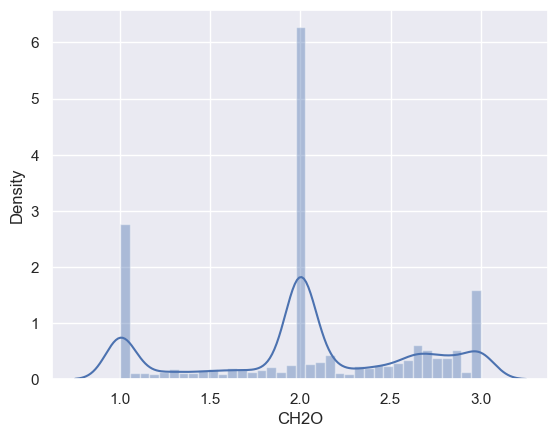

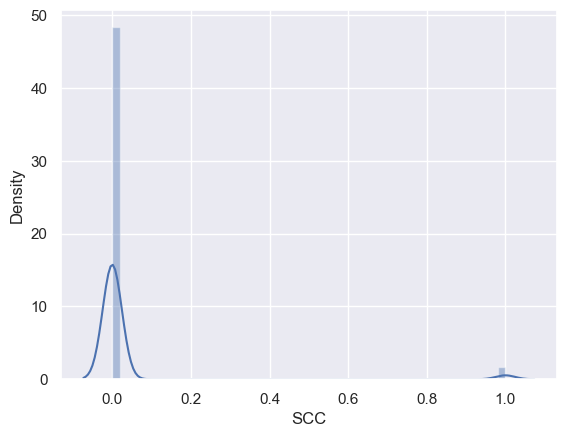

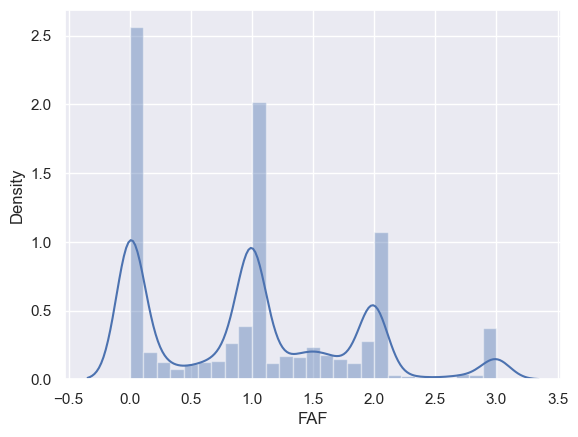

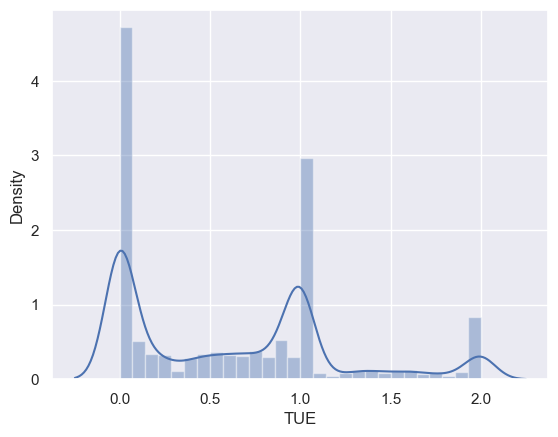

In [9]:
# Find the distribution of data
def distplots(col):
    sns.distplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=["object"]).columns)[0:]:
    distplots(i)

In [10]:
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,2.794537,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.538479,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [11]:
object_columns = df.select_dtypes(include=['object']).columns
print("object type columns :")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nnumerical type columns :")
print(numerical_columns)

object type columns :
Index(['Gender', 'CALC', 'MTRANS', 'Label'], dtype='object')

numerical type columns :
Index(['id', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [13]:
#  Removing unwanted features

df = df.drop(["id","MTRANS"],axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Label
0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,3,0,2.763573,0,0.000000,0.976473,1,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,Normal_Weight
2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,3,0,1.910378,0,0.866045,1.673584,0,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,3,0,1.674061,0,1.467863,0.780199,1,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,3,0,1.979848,0,1.967973,0.931721,1,Overweight_Level_II


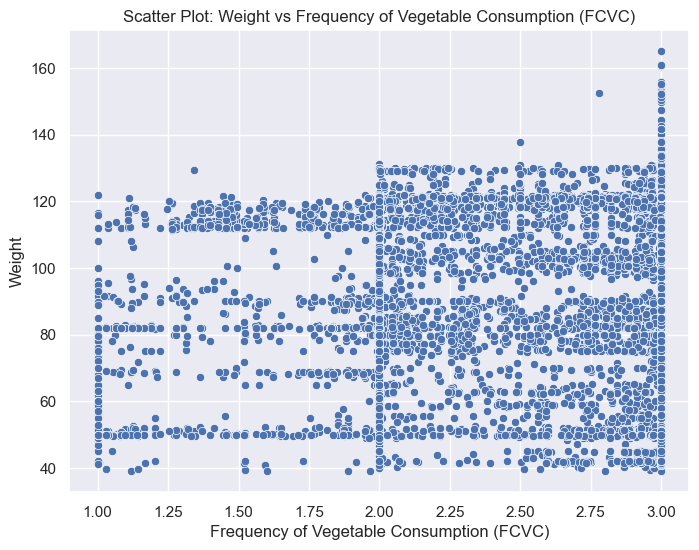

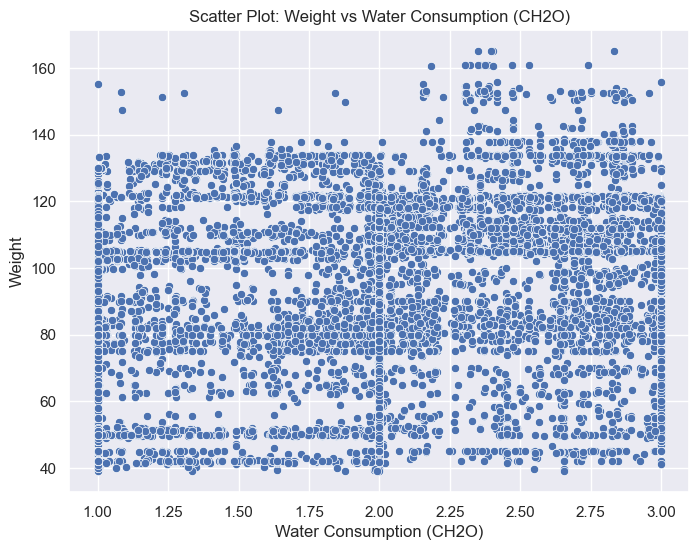

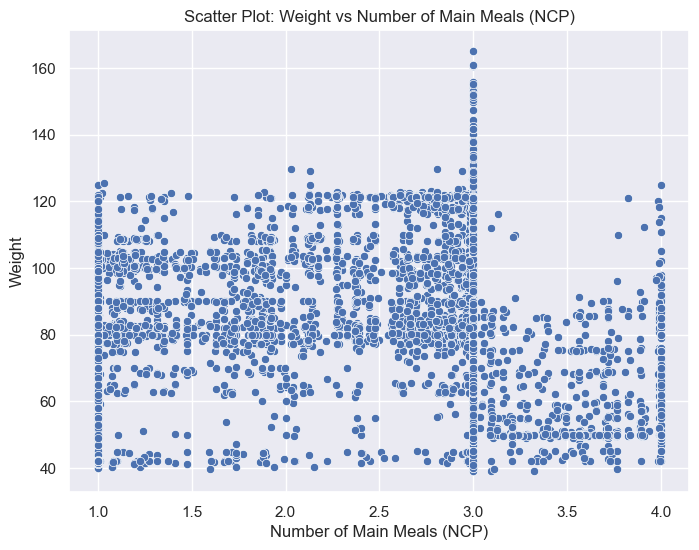

In [14]:
# Scatter plot for Weight vs FCVC
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='FCVC', y='Weight')
plt.title('Scatter Plot: Weight vs Frequency of Vegetable Consumption (FCVC)')
plt.xlabel('Frequency of Vegetable Consumption (FCVC)')
plt.ylabel('Weight')
plt.show()

# Scatter plot for Weight vs CH2O
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CH2O', y='Weight')
plt.title('Scatter Plot: Weight vs Water Consumption (CH2O)')
plt.xlabel('Water Consumption (CH2O)')
plt.ylabel('Weight')
plt.show()

# Scatter plot for Weight vs NCP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='NCP', y='Weight')
plt.title('Scatter Plot: Weight vs Number of Main Meals (NCP)')
plt.xlabel('Number of Main Meals (NCP)')
plt.ylabel('Weight')
plt.show()

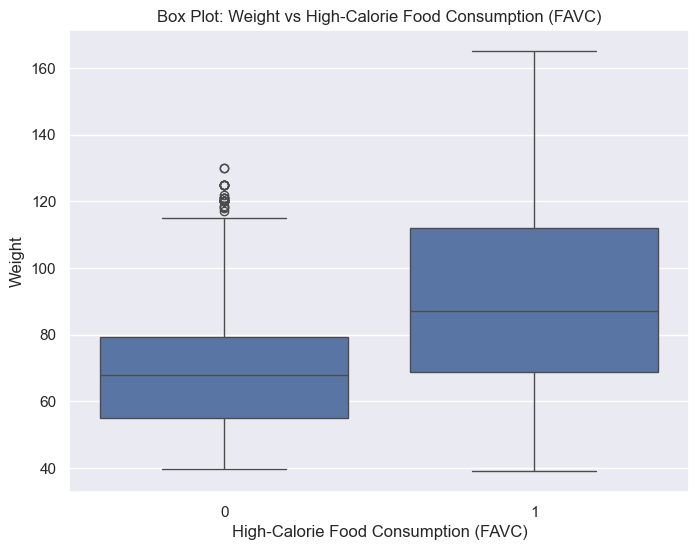

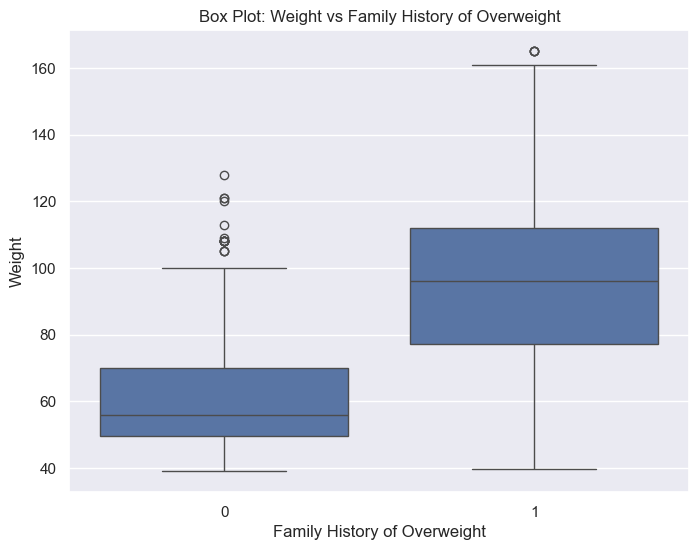

In [15]:
# Box plot for Weight vs FAVC (Frequent High-Calorie Food Consumption)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='FAVC', y='Weight')
plt.title('Box Plot: Weight vs High-Calorie Food Consumption (FAVC)')
plt.xlabel('High-Calorie Food Consumption (FAVC)')
plt.ylabel('Weight')
plt.show()

# Box plot for Weight vs family_history_with_overweight
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='family_history_with_overweight', y='Weight')
plt.title('Box Plot: Weight vs Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Weight')
plt.show()


In [16]:
# Creating New Feature called Body Mass Index (BMI)
# Ensure height is in meters before calculating BMI

df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Display the first few rows to verify the new feature
print(df[['Height', 'Weight', 'BMI']].head())

     Height      Weight        BMI
0  1.699998   81.669950  28.259565
1  1.560000   57.000000  23.422091
2  1.711460   50.165754  17.126706
3  1.710730  131.274851  44.855798
4  1.914186   93.798055  25.599151


In [17]:
# Summary statistics for BMI
print("\nSummary Statistics for BMI:")
print(df['BMI'].describe())


Summary Statistics for BMI:
count    20758.000000
mean        30.241842
std          8.333932
min         12.868541
25%         24.088223
50%         29.384757
75%         37.011168
max         54.997991
Name: BMI, dtype: float64


In [18]:
# Types of data variables
### categorical and numerical
### categorical - categorical feature and non-categorical feature
### numerical  - discrete and continuous
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype =='object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64','int32']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features,discrete_features,continuous_features

In [19]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [20]:
print("categorical :", categorical)
print("**************************************")
print("non_categorical :", non_categorical)
print("**************************************")
print("discrete :", discrete)
print("**************************************")
print("continuous :", continuous)
print("**************************************")

categorical : ['Gender', 'CALC', 'Label']
**************************************
non_categorical : []
**************************************
discrete : ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']
**************************************
continuous : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
**************************************


In [21]:
df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,BMI
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,2.794537,0.011803,2.029418,0.033096,0.981747,0.616756,30.241842
std,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.538479,0.108000,0.608467,0.178891,0.838302,0.602113,8.333932
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.868541
25%,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000,24.088223
50%,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887,29.384757
75%,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000,37.011168
max,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,54.997991


In [22]:
# Flooring the binary values and integer values acording to the 

df['FCVC'] = np.floor(df['FCVC']).astype(int)
df['FCVC'] = df['FCVC'].clip(1, 3)
df["NCP"] = np.floor(df["NCP"]).astype(int)
df['NCP'] = df['NCP'].clip(1,4)
df['SCC'] = np.floor(df['SCC']).astype(int)
df['SCC'] = df['SCC'].clip(0,1)
df['FAF'] = np.floor(df['FAF']).astype(int)
df['FAF'] = df['FAF'].clip(0,3)
df['TUE'] = np.floor(df['TUE']).astype(int)
df['TUE'] = df['TUE'].clip(0,2)
df["Age"] = np.floor(df["Age"]).astype(int)
df["Age"] = df["Age"].clip(14,61)
df['CH2O'] = np.floor(df['CH2O']).astype(int)
df['CH2O'] = df['CH2O'].clip(1,3)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Label,BMI
0,Male,24,1.699998,81.669950,1,1,2,2,3,0,2,0,0,0,1,Overweight_Level_II,28.259565
1,Female,18,1.560000,57.000000,1,1,2,3,2,0,2,0,1,1,0,Normal_Weight,23.422091
2,Female,18,1.711460,50.165754,1,1,1,1,3,0,1,0,0,1,0,Insufficient_Weight,17.126706
3,Female,20,1.710730,131.274851,1,1,3,3,3,0,1,0,1,0,1,Obesity_Type_III,44.855798
4,Male,31,1.914186,93.798055,1,1,2,1,3,0,1,0,1,0,1,Overweight_Level_II,25.599151


In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical variables
binary_columns = ['Gender', 'FAVC', 'family_history_with_overweight']
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Replace "Frequently" with 2
df['CALC'] = df['CALC'].replace('Frequently', 2).astype(int)

# Display the first few rows to verify encoding
df.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Label,BMI
0,1,24,1.699998,81.669950,1,1,2,2,3,0,2,0,0,0,1,Overweight_Level_II,28.259565
1,0,18,1.560000,57.000000,1,1,2,3,2,0,2,0,1,1,0,Normal_Weight,23.422091
2,0,18,1.711460,50.165754,1,1,1,1,3,0,1,0,0,1,0,Insufficient_Weight,17.126706
3,0,20,1.710730,131.274851,1,1,3,3,3,0,1,0,1,0,1,Obesity_Type_III,44.855798
4,1,31,1.914186,93.798055,1,1,2,1,3,0,1,0,1,0,1,Overweight_Level_II,25.599151


In [24]:
# Verify the new column structure
print("\nUpdated Columns After Encoding:")
df.columns


Updated Columns After Encoding:


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'Label', 'BMI'],
      dtype='object')

In [25]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,0.497929,23.565950,1.700245,87.887768,0.819636,0.914443,2.301041,2.663407,2.794537,0.011803,1.780085,0.033096,0.773100,0.402062,0.776761,30.241842
std,0.500008,5.630841,0.087312,26.379443,0.384500,0.279716,0.588376,0.758286,0.538479,0.108000,0.568271,0.178891,0.827203,0.591259,0.473690,8.333932
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.868541
25%,0.000000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.088223
50%,0.000000,22.000000,1.700000,84.064875,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,29.384757
75%,1.000000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,37.011168
max,1.000000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,54.997991


In [26]:
df['Label'].value_counts()

Label
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [27]:
# Encoding the Target variable

Label_mapping = {'Insufficient_Weight':0,
                 'Normal_Weight':1,
                 'Overweight_Level_I':2,
                 'Overweight_Level_II':3,
                 'Obesity_Type_I':4,
                 'Obesity_Type_II':5,
                 'Obesity_Type_III':6}
df['Label_mapping'] = df['Label'].replace(Label_mapping)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Label,BMI,Label_mapping
0,1,24,1.699998,81.669950,1,1,2,2,3,0,2,0,0,0,1,Overweight_Level_II,28.259565,3
1,0,18,1.560000,57.000000,1,1,2,3,2,0,2,0,1,1,0,Normal_Weight,23.422091,1
2,0,18,1.711460,50.165754,1,1,1,1,3,0,1,0,0,1,0,Insufficient_Weight,17.126706,0
3,0,20,1.710730,131.274851,1,1,3,3,3,0,1,0,1,0,1,Obesity_Type_III,44.855798,6
4,1,31,1.914186,93.798055,1,1,2,1,3,0,1,0,1,0,1,Overweight_Level_II,25.599151,3


In [28]:
df = df.drop(['Label'],axis=1)

# Split the data into ind and dep variable

In [29]:
x = df.drop('Label_mapping',axis=1)
y = df['Label_mapping']
x.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
0,1,24,1.699998,81.669950,1,1,2,2,3,0,2,0,0,0,1,28.259565
1,0,18,1.560000,57.000000,1,1,2,3,2,0,2,0,1,1,0,23.422091
2,0,18,1.711460,50.165754,1,1,1,1,3,0,1,0,0,1,0,17.126706
3,0,20,1.710730,131.274851,1,1,3,3,3,0,1,0,1,0,1,44.855798
4,1,31,1.914186,93.798055,1,1,2,1,3,0,1,0,1,0,1,25.599151


In [30]:
x.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'BMI'],
      dtype='object')

# Split the data into training and testing for building the model and prediction

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# Building Classification Algorithm/Model

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier

            Method Used  Accuracy
0    LogisticRegression  0.688825
1          DecisionTree  0.844894
2          RandomForest  0.892582
3               Bagging  0.878854
4      GradientBoosting  0.894027
5         SupportVector  0.826830
6                   KNN  0.881021
7    NaiveBayesGaussian  0.772640
8   NiaveBayesBernoulli  0.526012
9               XGBoost  0.897881
10     VotingClassifier  0.896917
Axes(0.125,0.11;0.775x0.77)


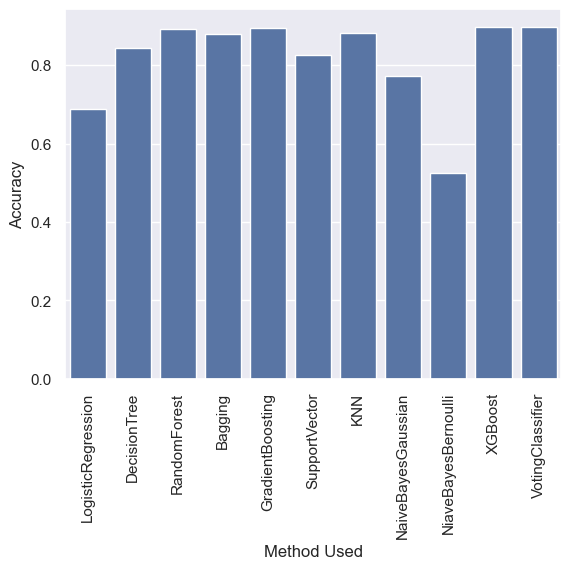

In [33]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagging = BaggingClassifier()
bg = bagging.fit(x_train, y_train)
y_pred_bg = bagging.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier
gradient = GradientBoostingClassifier()
gb = gradient.fit(x_train, y_train)
y_pred_gb = gradient.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# SVC
svm = SVC()
sv = svm.fit(x_train, y_train)
y_pred_sv= svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

# KNeighborsClassifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_kn= knn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)

# GaussianNB
nvtg = GaussianNB()
gn = nvtg.fit(x_train, y_train)
y_pred_gn= nvtg.predict(x_test)
accuracy_gn = accuracy_score(y_test, y_pred_gn)

# GaussianNB
nvb = BernoulliNB()
bn = nvb.fit(x_train, y_train)
y_pred_bn= nvb.predict(x_test)
accuracy_bn = accuracy_score(y_test, y_pred_bn)

# XGBClassifier
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg= xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# Voting Classifier - combining all model together and making one algorithm

evc = VotingClassifier(estimators = [('lr', lr),('dt', dt),('rf', rf),
                                     ('bg', bg),('gb', gb), ('svm', sv),
                                     ('knn', kn),('gnv', gn),('bnv', bn),
                                     ('xgb', xg)], voting='hard',
                       flatten_transform = True)
model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression','DecisionTree', 'RandomForest','Bagging',
         'GradientBoosting','SupportVector','KNN', 'NaiveBayesGaussian',
         'NiaveBayesBernoulli','XGBoost','VotingClassifier']
list2 = [accuracy_lr,accuracy_dt, accuracy_rf, accuracy_bg, accuracy_gb,
         accuracy_sv, accuracy_kn, accuracy_gn, accuracy_bn,accuracy_xg,
         accuracy_evc]
list3 = [logit,dtree,rforest,bagging,gradient,svm, knn, nvtg, nvb,xgb,evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, 'Accuracy' : list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

# Cross validation method

In [35]:
from sklearn.model_selection import cross_val_score
training_acc = cross_val_score(xg, x_train, y_train, cv=10)
test_acc = cross_val_score(xg, x_test, y_test, cv=10)
print(training_acc.max())
print()
print(test_acc.max())

0.908433734939759

0.9036144578313253


# Save the model for Deployment

In [36]:
import pickle
with open("xg_obesity_level.pkl",'wb') as file:
    pickle.dump(xg, file)

In [ ]:
print("pickle module is available")


pickle module is available
